In [ ]:
<center>
<img src=https://upload.wikimedia.org/wikipedia/commons/6/69/IMDB_Logo_2016.svg width=800 height=500 />
</center>

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* In this project we will use IMBD dataset to discover best movies , certificate , rating , duration ... <br>
* The objective of this project is : <br>

1: Loading dataset<br>
2: EDA <br>
3: Cleaning <br>
4:getting infromative insights and infromation 

</div>

<a id="1"></a>
# <p style="padding:10px;background-color:#B01546;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import re
pd.set_option('display.max_columns' , None)
import warnings
warnings.filterwarnings('ignore')


<a id="3"></a>
# <p style="padding:10px;background-color:#B01546;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Loading Dataset</p>


<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* Loading dataset and convert it to dataframe to have better view
* showing randomly 7 rows

</div>

In [2]:
dataset = pd.read_csv('/kaggle/input/imbd-dataset/IMBD.csv')
df = pd.DataFrame(dataset)
print('View of dataset:')
df.sample(7)

View of dataset:


,title,year,certificate,duration,genre,rating,description,stars,votes
36,The Blacklist,(2013– ),TV-14,43 min,"Crime, Drama, Mystery",8.0,"A new FBI profiler, Elizabeth Keen, has her en...","['James Spader, ', 'Megan Boone, ', 'Diego Kla...","245,591"
3049,Radio Rebel,(2012 TV Movie),TV-G,85 min,"Comedy, Drama, Family",5.8,"Tara, a painfully shy high-schooler, has a sec...","['Peter Howitt', '| ', ' Stars:', 'Debby Ry...","9,915"
4825,Toon,(2016– ),NaN,25 min,Comedy,7.6,"A reclusive, socially awkward jingle composer ...","['Joep Vermolen, ', 'Amy van der Weerden, ', '...",907
5150,Angela's Christmas Wish,(2020),TV-Y7-FV,47 min,"Animation, Adventure, Comedy",7.0,"A sequel to the much loved Angela's Christmas,...","[""Damien O'Connor"", '| ', ' Stars:', ""Anya ...","1,467"
1653,Ganglands,(2021– ),TV-MA,44 min,"Action, Crime, Drama",7.0,"Mehdi, a qualified robber, and Liana, an appre...","['Tracy Gotoas, ', 'Sofia Lesaffre, ', 'Salim ...","2,640"
8810,Lucifer,(2016–2021),TV-14,51 min,"Crime, Drama, Fantasy",8.0,Lucifer toys with a murder victim while Chloe ...,"['Eagle Egilsson', '| ', ' Stars:', 'Tom El...","4,230"
377,Merlí,(2015–2018),TV-MA,58 min,"Comedy, Drama, Romance",8.6,TV series about a high school philosophy teach...,"['Francesc Orella, ', 'Pere Ponce, ', 'Carlos ...","8,555"


<a id="3"></a>
# <p style="padding:10px;background-color:#B01546;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Description</p>


<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* I create a class color to use  of different styles for text such as BULE color , BOLD , UNDERLINE and  END  
to have better and colorful texts  

</div>

In [3]:
class color :
    BLUE = '\033[94m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [4]:
print(f'{color.BOLD}The shape of dataset is :{df.shape}')

The shape of dataset is :(9957, 9)


In [5]:
print('Columns are :\n')
print(f'{color.BOLD}{df.columns}')

Columns are :

Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes'],
      dtype='object')


<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* shape is : 9957 samples and 9 features <br>

1- title : The name of the movie <br>
2- year  : The year of production (also series are combined)<br>
3- certificate : each movie has a specific allowence compancy (this column has names of company for each movie)<br>
4- duration : The time for each movie <br>
5- genre : movie kind such as romantic , horror , etc ... . <br>
6- rating : IMBD has a specific score for each movie <br>
7- description : Sumarry of the movie <br>
8- starts : actors and actresses <br>
9- votes : views and opinions of people for the movie <br>
</div>

In [6]:
df.describe(include='all')

,title,year,certificate,duration,genre,rating,description,stars,votes
count,9957,9430,6504,7921,9884,8784.000000,9957,9957,8784
unique,7912,498,20,291,569,NaN,9433,8615,4862
top,Top Gear,(2020),TV-MA,60 min,Comedy,NaN,Add a Plot,[],30
freq,92,663,2520,385,859,NaN,434,403,33
mean,NaN,NaN,NaN,NaN,NaN,6.764515,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.214840,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.700000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,6.100000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.900000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* we can observe that just three columns dont have null values and others have with different amont of null values
* type of year , duration and votes features can be numeric but ther are object 
* so , I am going to create a function to descripe all the details  like dtype , unique values , count ,<br>
missing values and perecntage of missing values


</div>

In [8]:
def dataset_details(dataset):
    feature = []
    dtype = []
    unique =[]
    count = []
    missing_values=[]
    missing_percentage = []
    
    for column in df.columns :
        feature.append(column)
        dtype.append(df[column].dtype)
        unique.append(df[column].unique())
        count.append(len(df[column]))
        missing_values.append(df[column].isnull().sum())
        missing_percentage.append(round((df[column].isnull().sum()/len(df))*100 , 2))
        
        
    details = pd.DataFrame({
        'Feature' : feature , 
        'Type' : dtype , 
        'Count' : count , 
        'Unique' : unique , 
        "Missed Values" : missing_values,
        'Missed Percent%' : missing_percentage,
       
    })
    
    return details

In [9]:
dataset_details(df)

,Feature,Type,Count,Unique,Missed Values,Missed Percent%
0,title,object,9957,"[Cobra Kai, The Crown, Better Call Saul, Devil...",0,0.00
1,year,object,9957,"[(2018– ), (2016– ), (2015–2022), (2022), (202...",527,5.29
2,certificate,object,9957,"[TV-14, TV-MA, NC-17, R, PG-13, nan, TV-PG, PG...",3453,34.68
3,duration,object,9957,"[30 min, 58 min, 46 min, 356 min, 24 min, 45 m...",2036,20.45
4,genre,object,9957,"[Action, Comedy, Drama, Biography, Drama, Hist...",73,0.73
5,rating,float64,9957,"[8.5, 8.7, 8.9, 5.9, 8.6, 7.8, 9.2, 9.5, 6.3, ...",1173,11.78
6,description,object,9957,[Decades after their 1984 All Valley Karate To...,0,0.00
7,stars,object,9957,"[['Ralph Macchio, ', 'William Zabka, ', 'Court...",0,0.00
8,votes,object,9957,"[177,031, 199,885, 501,384, 9,773, 15,413, 116...",1173,11.78


<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* we can see that certificate and duarion have the hieghest missed values with 34% , 20% respectively.<br>
* rating and year have also 1173 and 537 missed values stands for approximately 12 % and 5%<br>
* lets check duplicated values:<br>
</div>

In [10]:
df.duplicated().sum()

0

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* There is no duplicated values<br>
* lets show again Missed values by a illustration mode to have better insights<br>
</div>

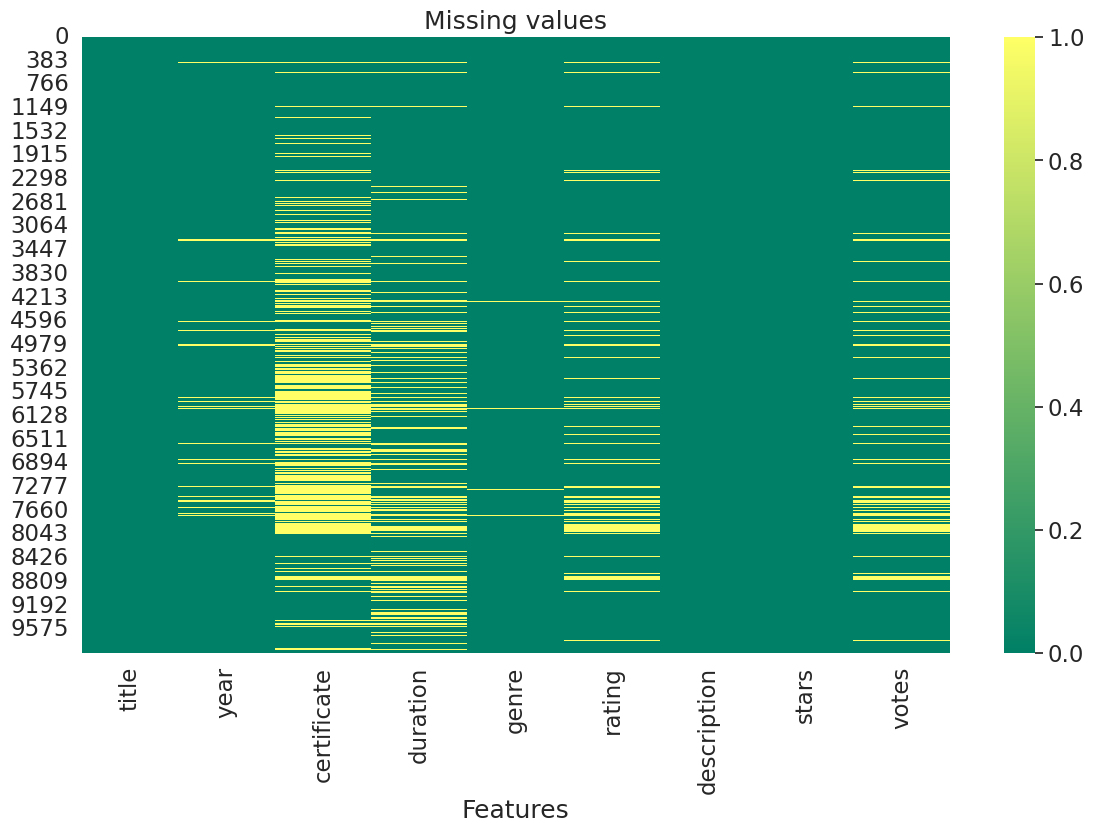

In [11]:
sns.set(style="darkgrid",font_scale=1.5)
plt.figure(figsize=(14,8))
sns.heatmap(df.isnull(),cmap="summer")
plt.xlabel('Features')
plt.title('Missing values')
plt.show()

<a id="3"></a>
# <p style="padding:10px;background-color:#B01546;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Cleaning and EDA</p>


<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* Lets fill all missed values by NAN 
</div>

In [12]:
df.fillna('NAN' , inplace=True)

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* column year requires to be cleaned => except numbers and NAN we will put space<br> 
* we fill one or more spaces with just one space <br>
* now we have good looking year column
</div>

In [13]:

# df['year'] = df['year'].apply(lambda x : x.split('(')[1].split(')')[0])
df['year'] = df['year'].apply(lambda x : re.sub('[^0-9NAN-]' , ' ' ,x))
df['year'] = df['year'].apply(lambda x : re.sub(r'[ ]+' , ' ' , x))
df.head(6)

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,2018,TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,2016,TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,2015 2022,TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,2022,TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,2022,TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
5,The Sandman,2022,TV-MA,45 min,"Drama, Fantasy, Horror",7.8,Upon escaping after decades of imprisonment by...,"['Tom Sturridge, ', 'Boyd Holbrook, ', 'Patton...","116,358"


<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* checking all unique values and its numbers<br>
* useing plotly to visualize this column
</div>

In [14]:
print(f'{color.BOLD}Unique years is :  ' , len(df.year.unique()))
print('*' * 30)
df.year.unique()

Unique years is :   270
******************************


array([' 2018 ', ' 2016 ', ' 2015 2022 ', ' 2022 ', ' 2013 ',
       ' 2008 2013 ', ' 2010 2022 ', ' 2013 2022 ', ' 2021 ', ' 2001 ',
       ' 2005 ', ' 2005 2020 ', ' 2011 ', ' 2003 ', ' 1994 2004 ',
       ' 2011 2021 ', ' 2009 2020 ', ' 2017 2022 ', ' 2011 2019 ',
       ' 2013 2020 ', ' 2019 ', ' 1989 1998 ', ' 2016 2021 ',
       ' 2019 2023 ', ' 2013 2021 ', ' 2000 2007 ', ' 2014 ', ' 2015 ',
       ' 2020 2023 ', ' 2013 2023 ', ' 2020 2022 ', ' 2017 2020 ',
       ' 2009 2017 ', ' 1999 ', ' 2016 2022 ', ' 2005 2014 ',
       ' 2009 2015 ', ' 2015 2018 ', ' 2010 ', ' 2015 2020 ', ' 2002 ',
       ' 2000 ', ' 2012 ', ' 2017 ', ' 2008 2014 ', ' 2007 2015 ',
       ' 2014 2023 ', ' 2009 ', ' 2015 2019 ', ' 1998 2006 ', ' 2020 ',
       ' 1997 ', ' 2010 2017 ', ' 2006 2013 ', ' 2011 2018 ',
       ' 2010 2015 ', ' 2001 2017 ', ' 1987 1994 ', ' 2014 2020 ',
       ' 2017 2021 ', ' 2013 2019 ', ' 1993 ', ' 2005 2017 ', ' 1975 ',
       ' 2010 2013 ', ' 1995 ', ' 2017 2019 ', ' 1984 199

In [15]:
hist = px.histogram(df['year'] , x='year' , title='Year distribution',color='year' , height=700 , width=900)
hist.show()

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* Obviousely , most movies years are between 2010 and 2022 

</div>

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* lets check certificate feature<br>
* one third of the rows are missed <br>
* TV-MA and TV-14 have the highest certificate allowance with 2520 and 1209 respectively<br>
* lets show this column 
</div>

In [16]:
print(f'{color.BOLD}Most repeated certificate')
print('*' * 30)
df.certificate.value_counts().to_frame().style.highlight_max(color='red')

Most repeated certificate
******************************


,count
certificate,
NAN,3453
TV-MA,2520
TV-14,1209
TV-PG,543
R,472
Not Rated,467
TV-Y7,349
PG-13,282
TV-Y,175


In [17]:
c_hist = px.histogram(df['certificate'],x='certificate' ,title='Certificate Districution' ,  color='certificate')
c_hist.show()

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* It's time for duration column <br>
* the amount of unique ones and printing all of them <br>
</div>

In [18]:
print(f'{color.BLUE}The len of unique duration is : {color.END}{len(df.duration.unique())}')
print('***' * 30)
df['duration'].unique()

The len of unique duration is : 292
******************************************************************************************


array(['30 min', '58 min', '46 min', '356 min', '24 min', '45 min',
       '23 min', '49 min', '166 min', '51 min', '89 min', '44 min',
       '139 min', '118 min', '110 min', '60 min', 'NAN', '178 min',
       '41 min', '50 min', '22 min', '326 min', '122 min', '101 min',
       '43 min', '42 min', '114 min', '55 min', '48 min', '113 min',
       '201 min', '53 min', '147 min', '54 min', '7 min', '104 min',
       '187 min', '179 min', '102 min', '169 min', '47 min', '534 min',
       '194 min', '88 min', '75 min', '25 min', '15 min', '70 min',
       '59 min', '127 min', '124 min', '106 min', '97 min', '52 min',
       '65 min', '135 min', '572 min', '112 min', '138 min', '155 min',
       '450 min', '121 min', '117 min', '111 min', '151 min', '129 min',
       '149 min', '98 min', '108 min', '116 min', '94 min', '40 min',
       '136 min', '115 min', '268 min', '132 min', '109 min', '128 min',
       '80 min', '56 min', '99 min', '545 min', '140 min', '96 min',
       '90 min', '125

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* It is better to convert the column name based on minute and then take each sample value and convert the column to integer <br>
* so we take value first , change the column name into duration(min) stands for minute , replace all NAN to 0 and convert to integer<br>
* and lets show its distribution to have better understanding
</div>

In [19]:
df['duration'] = df['duration'].apply(lambda x : x.split(' ')[0])
df.rename(columns={'duration' : 'duration(min)'} , inplace=True )
df['duration(min)'].replace({'NAN': 0} , inplace=True)
df['duration(min)']=df['duration(min)'].astype(int)

In [20]:
D_hist = px.histogram(df['duration(min)'] , x='duration(min)' , title='Duration' , color='duration(min)')
D_hist.show()

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* transparently , most of them are between about 30 - 130 minutes<br>
* lets look at thoes less than an hour <br>
* we can see that more than half of them are less than 60 minutes<br>
</div>

In [21]:
print(f'{color.BOLD}The number of movies with less duration that 60 minuts : ', len(df[df['duration(min)']<60]))
print('***' * 30)
df[df['duration(min)']<60]

The number of movies with less duration that 60 minuts :  5390
******************************************************************************************


,title,year,certificate,duration(min),genre,rating,description,stars,votes
0,Cobra Kai,2018,TV-14,30,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,2016,TV-MA,58,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,2015 2022,TV-MA,46,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
4,Cyberpunk: Edgerunners,2022,TV-MA,24,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
5,The Sandman,2022,TV-MA,45,"Drama, Fantasy, Horror",7.8,Upon escaping after decades of imprisonment by...,"['Tom Sturridge, ', 'Boyd Holbrook, ', 'Patton...","116,358"
...,...,...,...,...,...,...,...,...,...
9951,Breaking Bad,2008 2013,TV-MA,49,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...","1,831,359"
9952,The Imperfects,2022,TV-MA,45,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130"
9953,The Walking Dead,2010 2022,TV-MA,44,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067"
9954,The Crown,2016,TV-MA,58,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898"


<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* Here, im showing those movies with highest duration <br>
* the highest one is close to 1000 minutes <br>
</div>

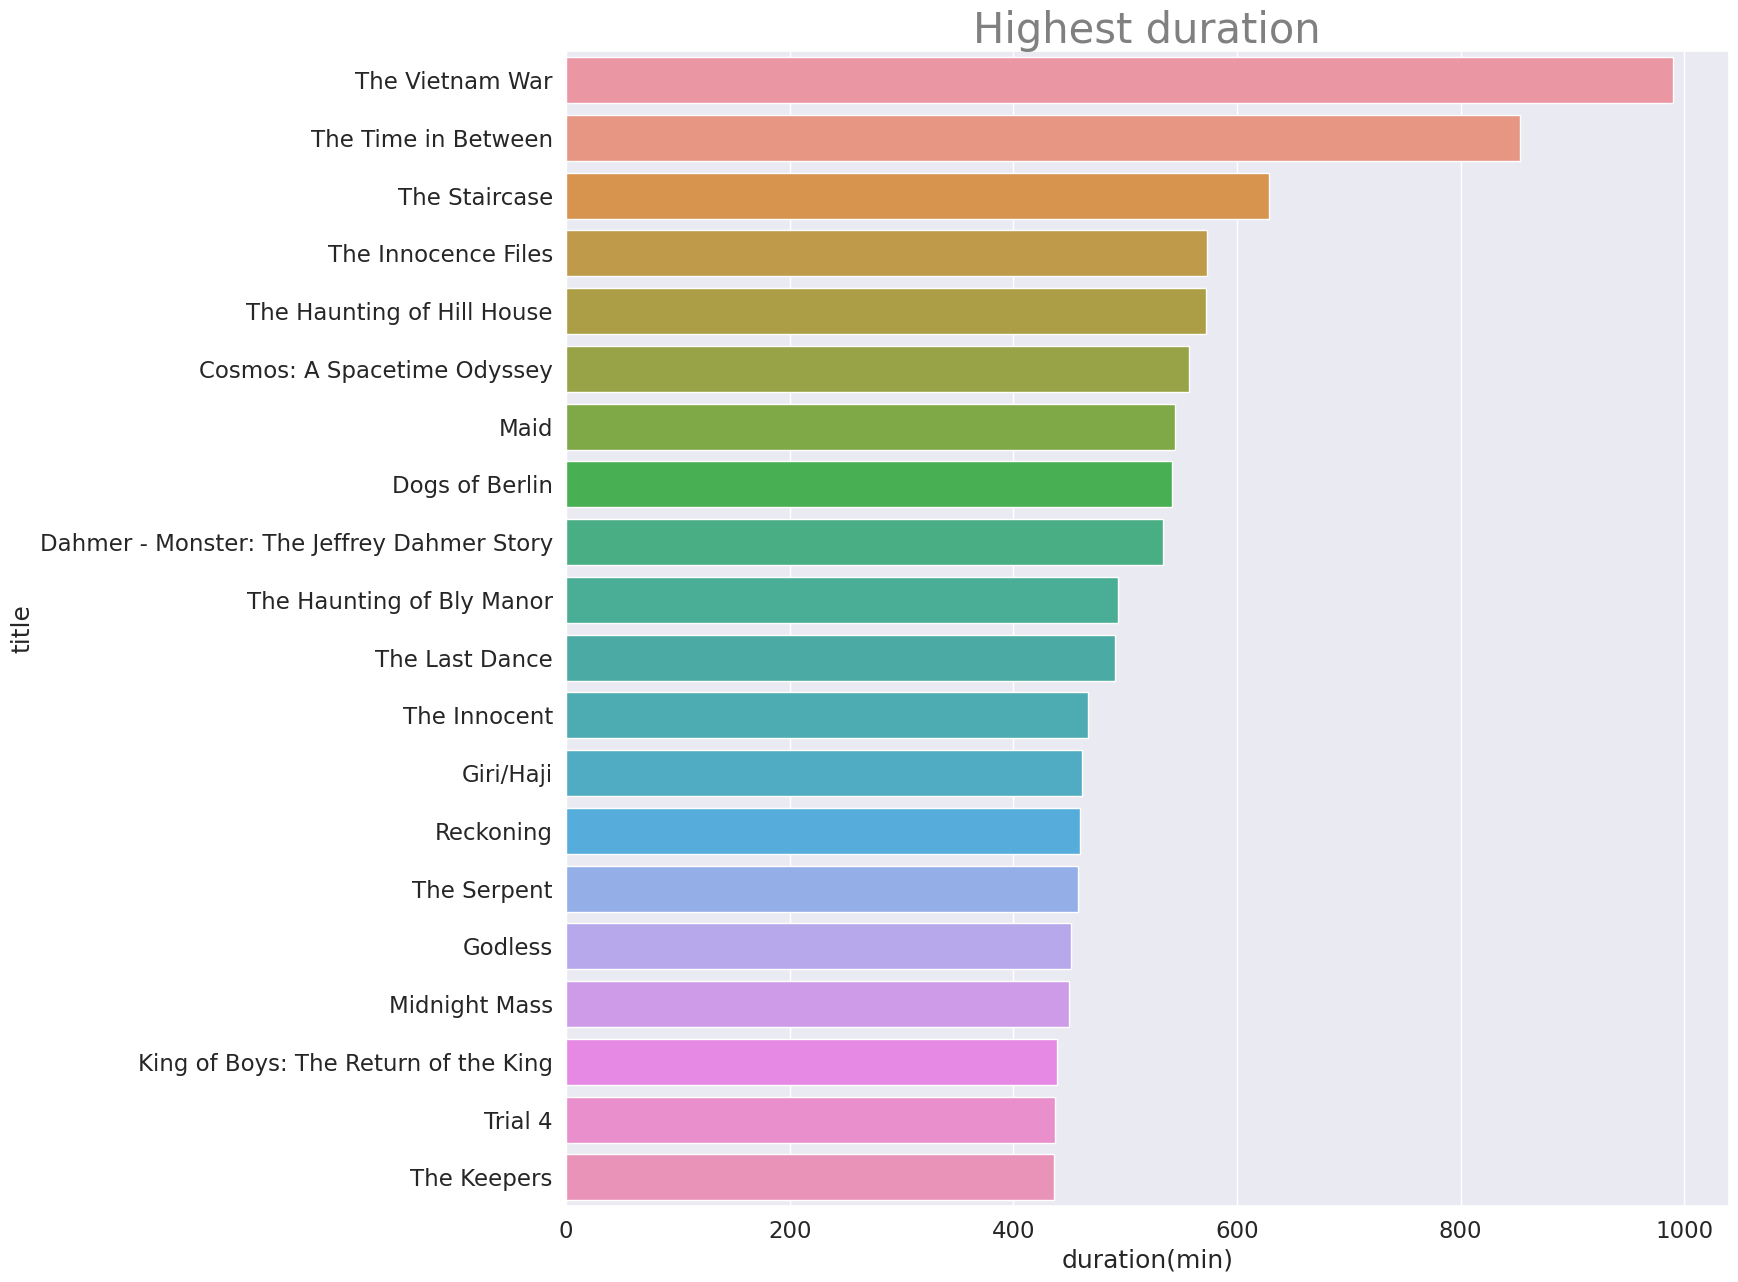

In [22]:
most_duration = df.sort_values(by='duration(min)' , ascending=False)[['title','duration(min)']][:20]
plt.figure(figsize=(15,15))
sns.barplot(x=most_duration['duration(min)'], y=most_duration['title'])
plt.title('Highest duration' , color='gray' ,size=30)
plt.show()

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* Each move has a combination of genres <br>
* Comedy( 859 ) , Animation Action( 553) , Drama(587) and Documentaru(518) have the hieghest repetition <br>

</div>

In [23]:
G_hist = px.histogram(df['genre'] , x='genre' , title='Genre' , color='genre' , height=600 , width=2000)
G_hist.show()

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* Becuase we want to show rating feature we put NaN values as 0 => 0 doesnt mean  that they have 0 scores(means NAN)<br>
* change the dtype to float <br>
* now lets look at hieghest rates <br>
* if we want to show lowest ones we can remove 0 ones , but I focus on hieghest ones<br>
* And I show top ten movies with the hieghest rating<br>
</div>

In [24]:
df['rating'].replace({'NAN':0} , inplace=True)
df['rating'] = df['rating'].astype(float)


In [25]:
print(f'{color.BOLD}Ordered based on highest rating')
print('**' * 30)
df.sort_values(by='rating' , ascending=False)

Ordered based on highest rating
************************************************************


,title,year,certificate,duration(min),genre,rating,description,stars,votes
9444,BoJack Horseman,2014 2020,TV-MA,26,"Animation, Comedy, Drama",9.9,BoJack reconnects with faces from his past.,"['Amy Winfrey', '| ', ' Stars:', 'Will Arne...","16,066"
8161,Avatar: The Last Airbender,2005 2008,TV-Y7,25,"Animation, Action, Adventure",9.6,The heroes work together to stop Azula's destr...,"['Michael Dante DiMartino', '| ', ' Stars:'...","5,221"
8907,Avatar: The Last Airbender,2005 2008,TV-Y7,24,"Animation, Action, Adventure",9.6,As the Fire Nation continues its assault on th...,"['Dave Filoni', '| ', ' Stars:', 'Zach Tyle...","3,953"
8557,JoJo's Bizarre Adventure,2012,TV-MA,25,"Animation, Action, Adventure",9.6,In the aftermath of the battle between Risotto...,"['Shinshû Fuji, ', 'Kellen Goff, ', 'Katsuyuki...","1,442"
17,1899,2022,NAN,60,"Drama, History, Horror",9.6,Multinational immigrants traveling from the ol...,"['Ben Ashenden, ', 'Aneurin Barnard, ', 'Emily...",853
...,...,...,...,...,...,...,...,...,...
3076,The Raid,NAN,NAN,0,"Action, Crime, Thriller",0.0,An international fugitive and his thugs trap a...,['Patrick Hughes'],NAN
3078,Baahubali: Before the Beginning,NAN,TV-14,0,"Action, Adventure, Drama",0.0,A mutinous and bitter girl with a vengeance ag...,"['Snigdha Akolkar, ', 'Mrunal Thakur, ', 'Bija...",NAN
7585,Prodigy,,NAN,0,"Action, Adventure, Fantasy",0.0,Super genius Edison Crane faces his first true...,[],NAN
3084,Viva La Madness,NAN,NAN,0,"Action, Crime, Drama",0.0,A drug dealer trying to get out of the crimina...,['Jason Statham'],NAN


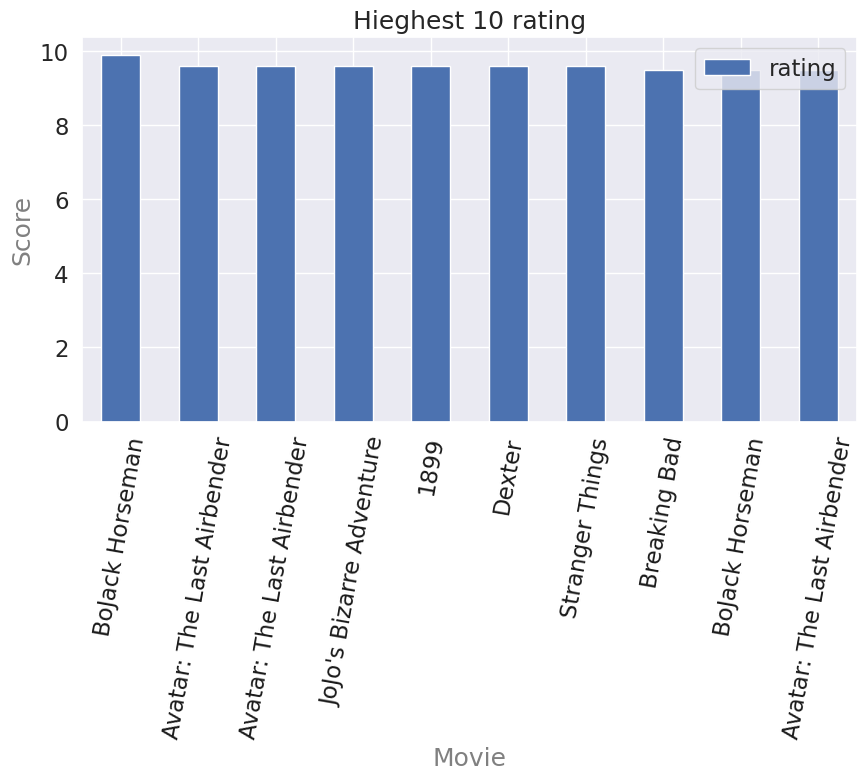

In [26]:
df.sort_values(by='rating' , ascending=False)[['title' , 'rating']].head(10).plot(kind='bar',
                                                                                  x='title' , y='rating',
                                                                                  figsize=(10,5),
                                                                                  title='Hieghest 10 rating',
                                                                                 )
plt.xlabel('Movie' , c='gray')
plt.ylabel('Score' , c='gray')
plt.xticks(rotation = 80 , color='k')
plt.show()

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* I only show 10 top movies with its descriptions <br>
* And then I clean the texts to have better looking<br>
</div>

In [27]:
df.sort_values(by='rating' , ascending=False)[['title' , 'rating' , 'description']].head(10)

,title,rating,description
9444,BoJack Horseman,9.9,BoJack reconnects with faces from his past.
8161,Avatar: The Last Airbender,9.6,The heroes work together to stop Azula's destr...
8907,Avatar: The Last Airbender,9.6,As the Fire Nation continues its assault on th...
8557,JoJo's Bizarre Adventure,9.6,In the aftermath of the battle between Risotto...
17,1899,9.6,Multinational immigrants traveling from the ol...
8259,Dexter,9.6,"In the Season One finale, Dexter follows the c..."
9578,Stranger Things,9.6,"As Hopper braces to battle a monster, Dustin d..."
9951,Breaking Bad,9.5,A high school chemistry teacher diagnosed with...
9445,BoJack Horseman,9.5,A celebration brings people together.
8044,Avatar: The Last Airbender,9.5,As Zuko tries to make it by in exile without h...


In [28]:
dataset["stars"]= dataset["stars"].apply(lambda x : re.sub('[^a-zA-Z]' ,',' ,x))
dataset['stars']= dataset['stars'].apply(lambda x : re.sub(r'\,+' , ',' , x))
dataset.sort_values(by='rating' , ascending=False)[['title' , 'rating' , 'stars']][:20]

,title,rating,stars
9444,BoJack Horseman,9.9,",Amy,Winfrey,Stars,Will,Arnett,Amy,Sedaris,Ali..."
9578,Stranger Things,9.6,",Matt,Duffer,Ross,Duffer,Stars,Winona,Ryder,Da..."
8161,Avatar: The Last Airbender,9.6,",Michael,Dante,DiMartino,Stars,Zach,Tyler,Eise..."
17,1899,9.6,",Ben,Ashenden,Aneurin,Barnard,Emily,Beecham,An..."
8259,Dexter,9.6,",Michael,Cuesta,Stars,Michael,C,Hall,Julie,Ben..."
8557,JoJo's Bizarre Adventure,9.6,",Shinsh,Fuji,Kellen,Goff,Katsuyuki,Konishi,Mic..."
8907,Avatar: The Last Airbender,9.6,",Dave,Filoni,Stars,Zach,Tyler,Eisen,Mae,Whitma..."
8044,Avatar: The Last Airbender,9.5,",Lauren,MacMullan,Stars,Dante,Basco,Grey,Griff..."
9445,BoJack Horseman,9.5,",Aaron,Long,Stars,Will,Arnett,Amy,Sedaris,Alis..."
9586,Avatar: The Last Airbender,9.5,",Ethan,Spaulding,Stars,Zach,Tyler,Eisen,Mae,Wh..."


<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* Like the rating column I put 0 as NUll values for vote column <br>
* cleaning the column => except numbers put string<br>
* then change the dtype <br>
* let's show top ten movies with hieghest votes<br>

In [29]:
df['votes'].replace({'NAN':'0'} , inplace=True)
df['votes'] = df['votes'].apply(lambda x : re.sub('[^0-9]', '' , x))
df['votes'] = df['votes'].astype(int)

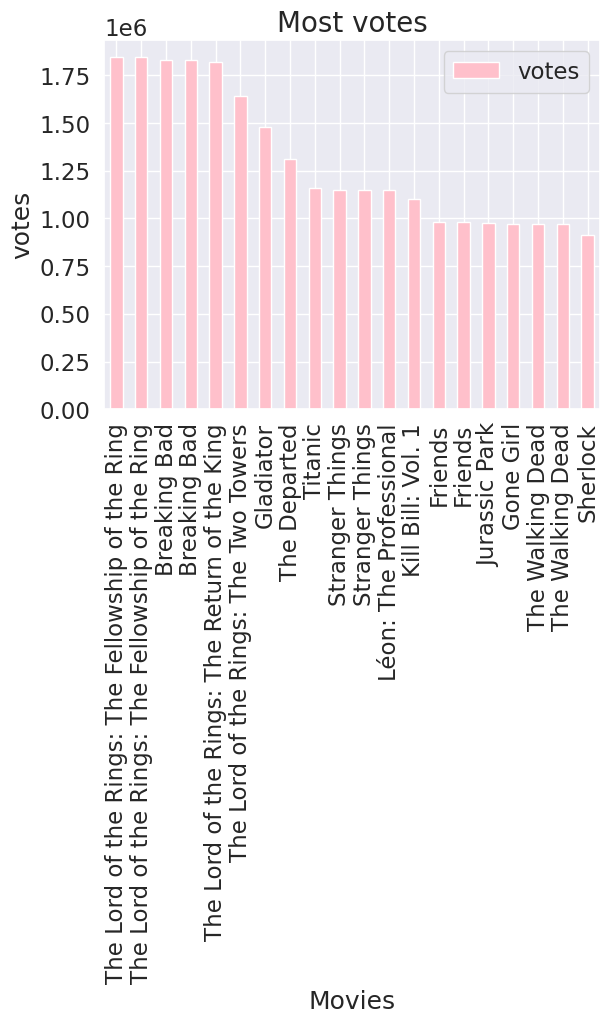

In [30]:
df.sort_values(by='votes' , ascending=False)[['title' , 'rating' , 'votes']][:20].plot(kind='bar' ,
                                                                                       x='title' ,
                                                                                       y='votes',
                                                                                     color='pink')
plt.xlabel('Movies')
plt.ylabel('votes')
plt.title('Most votes', size=20)
plt.show()

<a id="3"></a>
# <p style="padding:10px;background-color:#B01546;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">End </p>

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* We have discovered all momentous information and details together <br>
* Thank you for your support  
 
</div>